Iteration 100, Error: 0.007097
Iteration 200, Error: 0.003229
Iteration 300, Error: 0.001954
Iteration 400, Error: 0.001345
Iteration 500, Error: 0.000998
Solution converged in 500 iterations.


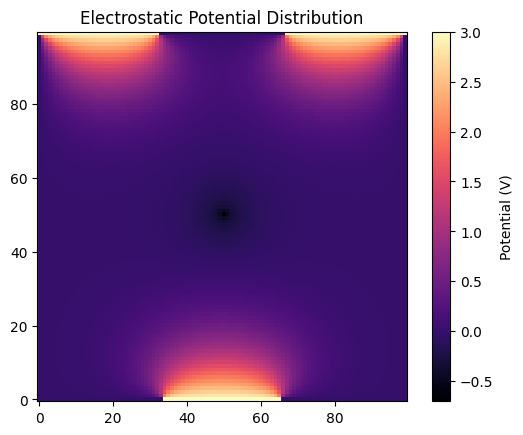

In [6]:
import numpy as np
import matplotlib.pyplot as plt

class PoissonSolver:
    def __init__(self, grid_size, source_function, bias_boundaries, tolerance=1e-3, max_iterations=1000):
        self.grid_size = grid_size
        self.source_function = source_function
        self.bias_boundaries = bias_boundaries
        self.tolerance = tolerance              # May need to be higher than usual to achieve convergence.
        self.max_iterations = max_iterations

        # Create grid and initialize potential field (phi)
        self.phi = np.zeros(grid_size)
        self.rho = np.zeros(grid_size)

        # Set the source function (charge density)
        self._set_source()

        # Set the boundary conditions
        self._set_boundary_conditions()

    def _set_source(self):
        """Set the source term (rho) based on the provided source function."""
        x, y = np.meshgrid(np.arange(self.grid_size[0]), np.arange(self.grid_size[1]))
        self.rho = self.source_function(x, y)
    
    def boundary_gate(self, x, y):
        if (int(grid_size[0] / 3.0) < x < 66) and (y == 0):
            return self.bias_boundaries[0]
        else:
            return 0

    def boundary_source(self, x, y):
        if (x < int(grid_size[0] / 3.0)) and (y == int(grid_size[1] - 1)):
            return self.bias_boundaries[1]
        else:
            return 0
        
    def boundary_drain(self, x, y):
        if (x > int(2 * grid_size[0] / 3.0)) and (y == int(grid_size[1] - 1)):
            return self.bias_boundaries[2]
        else:
            return 0

    def boundary_top(self, x, y):
        if (int(grid_size[0] / 3.0) < x < int(2 * grid_size[0] / 3.0)) and (y == int(grid_size[1] - 1)):
            return self.bias_boundaries[3]
        else:
            return 0

    def _set_boundary_conditions(self):
        """Apply boundary conditions to the grid."""
        X, Y = self.grid_size

        # Assuming to not overlap
        for i in range(X):
            self.phi[0, i] = self.boundary_gate(i, 0)
            self.phi[Y-1, i] = self.boundary_top(i, Y-1) + self.boundary_source(i, Y-1) + self.boundary_drain(i, Y-1)  # Bottom

        # for j in range(Y):
        #     self.phi[j, 0] = self.boundary_gate(0, j)  # Left
        #     self.phi[j, i] = self.boundary_gate(X-1, j)  # Right
            

    def solve(self):
        """Solve the Poisson equation using Gauss-Seidel iteration."""
        iteration = 0
        error = np.inf
        while iteration < self.max_iterations and error > self.tolerance:
            phi_prime = self.phi.copy()

            # Iterate over the internal grid points
            for i in range(1, self.grid_size[0] - 1):
                for j in range(1, self.grid_size[1] - 1):

                    if self.boundary_source(i, j):
                        phi_prime[i,j] = self.bias_boundaries[0]
                    elif self.boundary_drain(i, j):
                        phi_prime[i,j] = self.bias_boundaries[1]
                    elif self.boundary_gate(i, j):
                        phi_prime[i,j] = self.bias_boundaries[2]
                    elif self.boundary_top(i, j):
                        phi_prime[i,j] = self.bias_boundaries[3]
                    else: 
                        phi_prime[i, j] = 0.25 * (self.phi[i + 1, j] + self.phi[i - 1, j] + self.phi[i, j + 1] + self.phi[i, j - 1] - self.rho[i, j])

            # Compute the error
            error = np.max(np.abs(phi_prime - self.phi))
            self.phi = phi_prime
            iteration += 1

            if iteration % 100 == 0:
                print(f"Iteration {iteration}, Error: {error:.6f}")

        if error <= self.tolerance:
            print(f"Solution converged in {iteration} iterations.")
        else:
            print(f"No Convergence; Iteration: {self.max_iterations}, Error: {error:.6f}")

    def plot_solution(self):
        """Plot the potential field (phi) using matplotlib."""
        plt.imshow(self.phi, origin='lower', cmap='magma')
        plt.colorbar(label="Potential (V)")
        plt.title("Electrostatic Potential Distribution")
        plt.show()

# Place holder for potential DOS solver
# Define the source function (rho) and boundary conditions
def source_function(x, y):
    # Example: a point source at the center of the grid
    return np.exp(-10 * ((x - 50)**2 + (y - 50)**2))

bias_conditions = [3, 3, 3, 0]  # Zero potential at all boundaries

# Create the PoissonSolver object
grid_size = (100, 100)
poisson_solver = PoissonSolver(grid_size, source_function, bias_conditions)

# Solve the Poisson equation
poisson_solver.solve()

# Plot the solution
poisson_solver.plot_solution()
